In [1]:
import pandas as pd
import os

**Preparing Data for 2014**

In [5]:
#Working directory
os.chdir('/Users/khangphamgia/Downloads/2008-16Clean')
# Loop through the folder to export dta file to excel and save
for file in os.listdir():
    if file.endswith('.dta'):
        # Read the .dta file
        df = pd.read_stata(file)
        # Create a new filename with .xlsx extension
        new_filename = file.replace('.dta', '.xlsx')
        # Save the DataFrame to an Excel file
        df.to_excel(new_filename, index=False)



In [ ]:

#Load data sets
Phieu_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Phieu_New_14.xlsx")
Q9A_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Q9A_New_14.xlsx")
Q1_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Q1_New_14.xlsx")
Q2E_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Q2E_New_14.xlsx")
Q5F_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Q5F_New_14.xlsx")
Q7A_New_14 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Q7A_New_14.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/khangphamgia/Downloads/2008-16Clean/2014_new_excel/Phieu_New_14.xlsx'

In [ ]:
print(Q5F_New_14.head())

   tinh_2014  quan_2014  xa_2014  ma_h0_2014  p34ma_  p34q1_  p34q2_  p34q3a_  \
0        105          1       17           1       1       2      98       98   
1        105          1       17           1       2       1   36000        7   
2        105          1       17           2       2       2      98       98   
3        105          1       17           2       1       2      98       98   
4        105          1       17           3       2       2      98       98   

   p34q3b_  p34q3c_  p34q4a_  p34q4b_  p34q4c_  panel0816  
0     98.0     98.0       98     98.0     98.0        1.0  
1      NaN      NaN        5      NaN      NaN        1.0  
2     98.0     98.0       98     98.0     98.0        1.0  
3     98.0     98.0       98     98.0     98.0        1.0  
4     98.0     98.0       98     98.0     98.0        1.0  


**"Phieu_New_14" collect the general information of the households, from that based on their answers, they will be directed to different sections => The total number of households in the data is 2,725**

In [ ]:
#summary dataset
print(Phieu_New_14) 

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  tinh_2012  quan_2012  \
0           105          1       17           1      105.0        1.0   
1           105          1       17           2      105.0        1.0   
2           105          1       17           3      105.0        1.0   
3           105          1       17          91      105.0        1.0   
4           105          1       23           1      105.0        1.0   
...         ...        ...      ...         ...        ...        ...   
2720        801         27       23           1      801.0       27.0   
2721        801         27       23           2      801.0       27.0   
2722        801         27       23           3      801.0       27.0   
2723        801         27       29           1      801.0       27.0   
2724        801         27       29           2      801.0       27.0   

      xa_2012  ma_h0_2012  thay_cho_o  thay_doi_chu_ho  ...  p58q7b_02  \
0        17.0         1.0           2            

**"Q9A_New_14" is the section 9: SHOCKS AND RISK COPING, record answer of those who answer "Yes" to the question of "Does your household have any type of insurance" in "Phieu_New_14" => The total number in the data is 2678**

In [ ]:
print(Q9A_New_14)

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p43q2_  p43q3_  p43q4a_  \
0           105          1       17           1       6       1       99   
1           105          1       17           1       9       1       98   
2           105          1       17           2       9       1       98   
3           105          1       17           3       9       1       98   
4           105          1       17          91       5       1      500   
...         ...        ...      ...         ...     ...     ...      ...   
2672        801         27       17           3       5       1     1480   
2673        801         27       17           3       6       1      277   
2674        801         27       17           3       7       1      180   
2675        801         27       23           2       6       1       98   
2676        801         27       29           2       5       1      624   

      p43q4b_  p43q5_  panel0816  
0          98   12000        1.0  
1          98    

**"Q7A_New_14" is the section 7: EXPENDITURES, SAVINGS, AND ASSETS. Section 7A records Food Expenditures (in the last 4 weeks). The households were asked whether they consume any of the 14 food items, each row represents 1 food item -> their quantity, price value -> total monetary value of that food item. Not applicable = 98**

In [ ]:
#Clear any rows with values in the column p37q2_, p37q3_ that has the value 98 
Q7A_New_14 = Q7A_New_14[Q7A_New_14.p37q2_ != 98]
#Drop rows with missing values
Q7A_New_14 = Q7A_New_14.dropna()
#Sum up the values of p37q2_ 
Q7A_New_14_grouped = Q7A_New_14.groupby(['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'])['p37q4_'].sum().reset_index()
print(Q7A_New_14_grouped)


      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p37q4_
0           105          1       17           1   945.0
1           105          1       17           2   820.0
2           105          1       17           3  1230.0
3           105          1       23           1   485.0
4           105          1       23           2  1960.0
...         ...        ...      ...         ...     ...
2122        801         27       23           1  3420.0
2123        801         27       23           2   490.0
2124        801         27       23           3  2100.0
2125        801         27       29           1   150.0
2126        801         27       29           2   420.0

[2127 rows x 5 columns]


In [ ]:
#Keep only the following columns 
Phieu_New_14_clean = Phieu_New_14[['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014', 'p35q10', 'p43q1', 'p43q6', 'thien_tai', 'p42q21', 'p54q1', 'p55q2', 'p36q1']]
print(Phieu_New_14_clean)


      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p35q10  p43q1  p43q6  \
0           105          1       17           1  124500      1     98   
1           105          1       17           2  120500      1     98   
2           105          1       17           3   46000      1     98   
3           105          1       17          91  100640      1     98   
4           105          1       23           1   72000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2720        801         27       23           1  279040      2     98   
2721        801         27       23           2  100320      1     98   
2722        801         27       23           3  159000      2     98   
2723        801         27       29           1   16560      2     98   
2724        801         27       29           2   85350      1    724   

      thien_tai  p42q21  p54q1  p55q2  p36q1  
0             2       0      2      1    2.0  
1             2       0      

In [ ]:
merged_df = pd.merge(Phieu_New_14_clean, Q7A_New_14_grouped, on=['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'], how='left')
print(merged_df)

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p35q10  p43q1  p43q6  \
0           105          1       17           1  124500      1     98   
1           105          1       17           2  120500      1     98   
2           105          1       17           3   46000      1     98   
3           105          1       17          91  100640      1     98   
4           105          1       23           1   72000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2720        801         27       23           1  279040      2     98   
2721        801         27       23           2  100320      1     98   
2722        801         27       23           3  159000      2     98   
2723        801         27       29           1   16560      2     98   
2724        801         27       29           2   85350      1    724   

      thien_tai  p42q21  p54q1  p55q2  p36q1  p37q4_  
0             2       0      2      1    2.0   945.0  
1            

In [ ]:
#Drop NA values
Q2E_New_14 = Q2E_New_14.dropna()
# Group by the specified columns and apply the custom function
Q2E_New_14['p12q1_grouped'] = Q2E_New_14.groupby(['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'])['p12q1_'].transform(
    lambda x: x.iloc[0] if x.nunique() == 1 else 1
)
print(Q2E_New_14)
#Remove duplicates
Q2E_New_14 = Q2E_New_14.drop_duplicates(subset=['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'])


      tinh_2014  quan_2014  xa_2014  ma_h0_2014 p12ma_  p12q1_  p12q2a_  \
0           105          3       21          17    a15     2.0     98.0   
1           105          3       21          17    a18     2.0     98.0   
2           105          3       21          17     a9     2.0     98.0   
3           105          3       21          17    a16     2.0     98.0   
4           105          3       21          17    a14     2.0     98.0   
...         ...        ...      ...         ...    ...     ...      ...   
1860        801         25       25           9     b1     2.0     98.0   
1861        801         25       25           9     b2     2.0     98.0   
1863        801         25       25           9     a2     2.0     98.0   
1864        801         25       25          16     a2     2.0     98.0   
1865        801         25       25          16     a1     2.0     98.0   

      p12q2b_  p12q5_ p13ma_  p13q8_ p13ma1_  p13q11_  panel0816  \
0        98.0     2.0    a15   

In [ ]:
Q2E_New_14_clean = Q2E_New_14[['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014', 'p12q1_grouped']]
print(Q2E_New_14_clean)

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p12q1_grouped
0           105          3       21          17            2.0
11          105          5       15           1            2.0
19          105          5       31           2            2.0
25          105          5       53          12            2.0
36          105          5       53          14            2.0
...         ...        ...      ...         ...            ...
1852        801         23       11           2            2.0
1856        801         23       21           4            2.0
1859        801         25       25           7            2.0
1860        801         25       25           9            2.0
1864        801         25       25          16            2.0

[274 rows x 5 columns]


In [ ]:
# Merge the datasets using a left join
merged_df_full = pd.merge(merged_df, Q2E_New_14_clean, on=['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'], how='left')
#count the unique values of the column p12q1_grouped
merged_df_full['p12q1_grouped'].value_counts()


p12q1_grouped
2.0    218
1.0     56
Name: count, dtype: int64

In [ ]:
Q5F_New_14_grouped = Q5F_New_14.groupby(['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'])['p34q2_'].sum().reset_index()
print(Q5F_New_14_grouped)

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p34q2_
0           105          1       17           1   36098
1           105          1       17           2     196
2           105          1       17           3    1098
3           105          1       17          91     196
4           105          1       23           1     196
...         ...        ...      ...         ...     ...
2720        801         27       23           1   11138
2721        801         27       23           2    6320
2722        801         27       23           3     196
2723        801         27       29           1   16560
2724        801         27       29           2     196

[2725 rows x 5 columns]


In [ ]:
merged_df_full = pd.merge(merged_df_full, Q5F_New_14_grouped, on=['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'], how='left')
print(merged_df_full)

      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p35q10  p43q1  p43q6  \
0           105          1       17           1  124500      1     98   
1           105          1       17           2  120500      1     98   
2           105          1       17           3   46000      1     98   
3           105          1       17          91  100640      1     98   
4           105          1       23           1   72000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2720        801         27       23           1  279040      2     98   
2721        801         27       23           2  100320      1     98   
2722        801         27       23           3  159000      2     98   
2723        801         27       29           1   16560      2     98   
2724        801         27       29           2   85350      1    724   

      thien_tai  p42q21  p54q1  p55q2  p36q1  p37q4_  p12q1_grouped  p34q2_  
0             2       0      2      1    2.0 

In [ ]:
# Calculate family size for each household
family_size = Q1_New_14.groupby(['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014']).size().reset_index(name='family_size')

# Merge the family size back into the original dataframe
merged_df_2014 = pd.merge(merged_df_full, family_size, on=['tinh_2014', 'quan_2014', 'xa_2014', 'ma_h0_2014'], how='left')
print(merged_df_2014)



      tinh_2014  quan_2014  xa_2014  ma_h0_2014  p35q10  p43q1  p43q6  \
0           105          1       17           1  124500      1     98   
1           105          1       17           2  120500      1     98   
2           105          1       17           3   46000      1     98   
3           105          1       17          91  100640      1     98   
4           105          1       23           1   72000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2720        801         27       23           1  279040      2     98   
2721        801         27       23           2  100320      1     98   
2722        801         27       23           3  159000      2     98   
2723        801         27       29           1   16560      2     98   
2724        801         27       29           2   85350      1    724   

      thien_tai  p42q21  p54q1  p55q2  p36q1  p37q4_  p12q1_grouped  p34q2_  \
0             2       0      2      1    2.0

In [ ]:
merged_df_2014 = merged_df_2014.rename(columns={
    'tinh_2014': 'Province',
    'quan_2014': 'District',
    'xa_2014': 'Commune',
    'ma_h0_2014': 'Household_ID',
    'p35q10': 'Annual_Income_2014',
    'p43q1': 'Have_Insurance_2014',
    'p43q6': 'Interest_Purchasing_2014',
    'thien_tai': 'Disaster_2014',
    'p42q21': 'Loan_Rejected_2014',
    'p54q1': 'COCC_2014',
    'p55q2': 'Access_Internet_2014',
    'p36q1': 'Access_Service_2014',
    'p37q4_': 'Food_Consumption_2014',
    'p12q1_grouped': 'Plot_Investment_Dummy_2014',
    'p34q2_': 'Transfer_Received_2014',
    'family_size': 'Family_Size_2014'
})
print(merged_df_2014.head())

   Province  District  Commune  Household_ID  Annual_Income_2014  \
0       105         1       17             1              124500   
1       105         1       17             2              120500   
2       105         1       17             3               46000   
3       105         1       17            91              100640   
4       105         1       23             1               72000   

   Have_Insurance_2014  Interest_Purchasing_2014  Disaster_2014  \
0                    1                        98              2   
1                    1                        98              2   
2                    1                        98              2   
3                    1                        98              2   
4                    1                        98              2   

   Loan_Rejected_2014  COCC_2014  Access_Internet_2014  Access_Service_2014  \
0                   0          2                     1                  2.0   
1                   0         

In [ ]:
print(merged_df_2014.columns)

Index(['Province', 'District', 'Commune', 'Household_ID', 'Annual_Income_2014',
       'Have_Insurance_2014', 'Interest_Purchasing_2014', 'Disaster_2014',
       'Loan_Rejected_2014', 'COCC_2014', 'Access_Internet_2014',
       'Access_Service_2014', 'Food_Consumption_2014',
       'Plot_Investment_Dummy_2014', 'Transfer_Received_2014',
       'Family_Size_2014'],
      dtype='object')


**Preparing Data for 2016**

In [ ]:
Phieu_New_16 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2016_new_excel/Phieu_New_16.xlsx")
Q7A_New_16 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2016_new_excel/Q7A_New_16.xlsx")
Q2E_New_16 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2016_new_excel/Q2E_New_16.xlsx")
Q1_New_16 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2016_new_excel/Q1_New_16.xlsx")
Q5E_New_16 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2016_new_excel/Q5E_New_16.xlsx")


Variable used: 
- Household food consumption last month (total monetary value of each food item): Q7A_New_16 - "p36q4_"
- Household monthly income (total/12): Phieu_New_16 - "p34q10"
- Insurance: 
    Have any kind of insurance: Phieu_New_16 - "p42q1"
    Interest in purchasing: Phieu_New_16 - "p42q6"
- Disaster: Phieu_New_16 - "thien_tai"
- Liquidity: 
    How many time since 2014 got loan rejected: Phieu_New_16 - "p41q21"
- Economic: 
    Plot investment: Q2E_New_16 - "p12q1_"
    Receive transfer: Q5E_New_16 - "p33q2"
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_New_16 - "p57q1"
    Disaster: Phieu_New_16 - "thien_tai"
    Access to internet: Phieu_New_16 - "p58q2"
    Access to services: Phieu_New_16 - "p35q1"
- Demographic: 
    Family size (calculated from education level) - Q1_New_16 - "p2q10_"

In [ ]:
print(Q2E_New_16["p12q1_"])

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2078    2.0
2079    NaN
2080    2.0
2081    NaN
2082    2.0
Name: p12q1_, Length: 2083, dtype: float64


In [ ]:
print(Q7A_New_16.head())

   tinh_2016  quan_2016  xa_2016  ma_h0_2016  tinh_2014  quan_2014  xa_2014  \
0        105          1       17           1      105.0        1.0     17.0   
1        105          1       17           1      105.0        1.0     17.0   
2        105          1       17           1      105.0        1.0     17.0   
3        105          1       17           1      105.0        1.0     17.0   
4        105          1       17           1      105.0        1.0     17.0   

   ma_h0_2014  p36ma_  p36q1_  p36q2_  p36q3_  p36q4_  panel0816  
0         1.0       3       1     4.0   100.0   400.0        1.0  
1         1.0      11       1    15.0    20.0   300.0        1.0  
2         1.0      14       1     NaN     NaN  1000.0        1.0  
3         1.0       4       1     5.0    50.0   250.0        1.0  
4         1.0       2       1     2.0   220.0   440.0        1.0  


In [ ]:
#Clear any rows with values in the column p36q4_ that has the value 98 
Q7A_New_16 = Q7A_New_16[Q7A_New_16.p36q4_ != 98]
#Drop rows with missing values
Q7A_New_16 = Q7A_New_16.dropna()
#Sum up the values of p36q4_ 
Q7A_New_16_grouped = Q7A_New_16.groupby(['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'])['p36q4_'].sum().reset_index()
print(Q7A_New_16_grouped)


      tinh_2016  quan_2016  xa_2016  ma_h0_2016  p36q4_
0           105          1       17           1  2790.0
1           105          1       17           2  1080.0
2           105          1       17           3  2870.0
3           105          1       23           1  1120.0
4           105          1       23           2  1600.0
...         ...        ...      ...         ...     ...
2122        801         27       23           1   772.0
2123        801         27       23           2   777.0
2124        801         27       23           3   611.0
2125        801         27       29           1   140.0
2126        801         27       29           2   744.0

[2127 rows x 5 columns]


In [ ]:
Phieu_New_16

,tinh_2016,quan_2016,xa_2016,ma_h0_2016,tinh_2014,quan_2014,xa_2014,ma_h0_2014,thay_cho_o,thay_doi_chu_ho,...,p58q3b_08,p58q3b_09,p58q3b_10,p58q3b_11,p59q8,p59q9a,p59q9b,p59q9c,p59q9d,panel0816
0,105,1,17,1,105.0,1.0,17.0,1.0,2,2,...,9.0,9.0,9.0,9.0,10000.0,2.0,NaN,1,100.0,1.0
1,105,1,17,2,105.0,1.0,17.0,2.0,2,2,...,2.0,9.0,9.0,9.0,5000.0,2.0,NaN,1,100.0,1.0
2,105,1,17,3,105.0,1.0,17.0,3.0,2,2,...,9.0,9.0,9.0,9.0,15000.0,2.0,NaN,1,200.0,1.0
3,105,1,17,91,105.0,1.0,17.0,91.0,2,2,...,2.0,2.0,9.0,2.0,10000.0,2.0,NaN,1,100.0,NaN
4,105,1,23,1,105.0,1.0,23.0,1.0,2,2,...,9.0,9.0,9.0,9.0,3500.0,2.0,NaN,1,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,801,27,23,1,801.0,27.0,23.0,1.0,2,2,...,2.0,2.0,9.0,9.0,6000.0,2.0,NaN,1,300.0,1.0
2665,801,27,23,2,801.0,27.0,23.0,2.0,2,2,...,3.0,2.0,2.0,3.0,2000.0,2.0,NaN,1,100.0,1.0
2666,801,27,23,3,801.0,27.0,23.0,3.0,2,2,...,2.0,2.0,9.0,3.0,3000.0,2.0,NaN,1,100.0,1.0
2667,801,27,29,1,801.0,27.0,29.0,1.0,2,2,...,2.0,2.0,9.0,9.0,500.0,2.0,NaN,1,0.0,1.0


In [ ]:
Q5E_New_16_grouped = Q5E_New_16.groupby(['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'])['p33q2_'].sum().reset_index()
print(Q5E_New_16_grouped)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016   p33q2_
0           105          1       17           1  75600.0
1           105          1       17           2    621.0
2           105          1       17           3      0.0
3           105          1       17          91      0.0
4           105          1       23           1   3000.0
...         ...        ...      ...         ...      ...
2664        801         27       23           1  15336.0
2665        801         27       23           2  10620.0
2666        801         27       23           3  13480.0
2667        801         27       29           1   7460.0
2668        801         27       29           2   2890.0

[2669 rows x 5 columns]


In [ ]:
print(Q1_New_16)

       tinh_2016  quan_2016  xa_2016  ma_h0_2016  tinh_2014  quan_2014  \
0            105          1       17           1      105.0        1.0   
1            105          1       17           1      105.0        1.0   
2            105          1       17           1      105.0        1.0   
3            105          1       17           1      105.0        1.0   
4            105          1       17           1      105.0        1.0   
...          ...        ...      ...         ...        ...        ...   
10921        801         27       29           2      801.0       27.0   
10922        801         27       29           2      801.0       27.0   
10923        801         27       29           2      801.0       27.0   
10924        801         27       29           2      801.0       27.0   
10925        801         27       29           2      801.0       27.0   

       xa_2014  ma_h0_2014  p1stt_  p1q2_  ...  p2q11_  p2q12_  p2q13_  \
0         17.0         1.0       6   

In [ ]:
# Calculate family size for each household using record on education level of each member 
family_size_2016 = Q1_New_16.groupby(['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016']).size().reset_index(name='family_size')
print(family_size_2016)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016  family_size
0           105          1       17           1            7
1           105          1       17           2            6
2           105          1       17           3            5
3           105          1       17          91            4
4           105          1       23           1            3
...         ...        ...      ...         ...          ...
2664        801         27       23           1            6
2665        801         27       23           2            6
2666        801         27       23           3            4
2667        801         27       29           1            1
2668        801         27       29           2            5

[2669 rows x 5 columns]


Variable used: 
- Household food consumption last month (total monetary value of each food item): Q7A_New_16 - "p36q4_"
- Household monthly income (total/12): Phieu_New_16 - "p34q10"
- Insurance: 
    Have any kind of insurance: Phieu_New_16 - "p42q1"
    Interest in purchasing: Phieu_New_16 - "p42q6"
- Disaster: Phieu_New_16 - "thien_tai"
- Liquidity: 
    How many time since 2014 got loan rejected: Phieu_New_16 - "p41q21"
- Economic: 
    Plot investment: Q2E_New_16 - "p12q1_"
    Receive transfer: Q5E_New_16 - "p33q2"
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_New_16 - "p57q1"
    Disaster: Phieu_New_16 - "thien_tai"
    Access to internet: Phieu_New_16 - "p58q2"
    Access to services: Phieu_New_16 - "p35q1"
- Demographic: 
    Family size (calculated from education level) - Q1_New_16 - "p2q10_"

In [ ]:
#Keep only the following columns 
Phieu_New_16_clean = Phieu_New_16[['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016', 'p34q10', 'p42q1', 'p42q6', 'thien_tai', 'p41q21', 'p57q1' ,'p58q2', 'p35q1']]
print(Phieu_New_16_clean)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016  p34q10  p42q1  p42q6  \
0           105          1       17           1  234700      1     98   
1           105          1       17           2  124236      1     98   
2           105          1       17           3  302000      1     98   
3           105          1       17          91  102950      1    200   
4           105          1       23           1   46000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2664        801         27       23           1  252456      1     98   
2665        801         27       23           2  108060      1     98   
2666        801         27       23           3  313980      1     98   
2667        801         27       29           1    7460      1     98   
2668        801         27       29           2  280305      1     98   

      thien_tai  p41q21  p57q1  p58q2  p35q1  
0             1       0      2    1.0      1  
1             1       0      

In [ ]:
#Drop NA values
Q2E_New_16 = Q2E_New_16.dropna()
# Group by the specified columns and apply the custom function
Q2E_New_16['p12q1_grouped'] = Q2E_New_16.groupby(['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'])['p12q1_'].transform(
    lambda x: x.iloc[0] if x.nunique() == 1 else 1
)
print(Q2E_New_16)
#Remove duplicates
Q2E_New_16 = Q2E_New_16.drop_duplicates(subset=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'])
print(Q2E_New_16)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016  tinh_2014  quan_2014  \
12          105          5       53           1        105          5   
13          105          5       53           1        105          5   
19          105          5       53           6        105          5   
52          105         11        7          18        105         11   
59          105         13       17           3        105         13   
...         ...        ...      ...         ...        ...        ...   
2045        801         21       15           5        801         21   
2048        801         21       15           8        801         21   
2064        801         23       21           9        801         23   
2065        801         23       21           9        801         23   
2068        801         23       21           9        801         23   

      xa_2014  ma_h0_2014 p12ma_  p12q1_  p12q2a_  p12q2b_  p12q5_ p13ma_  \
12         53           1     a2     1.0      

In [ ]:
Q2E_New_16_clean = Q2E_New_16[['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016', 'p12q1_grouped']]
print(Q2E_New_16_clean)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016  p12q1_grouped
12          105          5       53           1            1.0
19          105          5       53           6            1.0
52          105         11        7          18            1.0
59          105         13       17           3            1.0
61          105         15       13           7            1.0
...         ...        ...      ...         ...            ...
1998        801         17        7           2            1.0
2006        801         17       19           1            1.0
2045        801         21       15           5            1.0
2048        801         21       15           8            1.0
2064        801         23       21           9            1.0

[127 rows x 5 columns]


In [ ]:
# Merge the datasets using a left join
merged_df_2016 = pd.merge(Phieu_New_16_clean, Q7A_New_16_grouped, on=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'], how='left')
merged_df_2016 = pd.merge(merged_df_2016, Q2E_New_16_clean, on=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'], how='left')
merged_df_2016 = pd.merge(merged_df_2016, Q5E_New_16_grouped, on=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'], how='left')
merged_df_2016 = pd.merge(merged_df_2016, family_size_2016, on=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'], how='left')
print(merged_df_2016)


      tinh_2016  quan_2016  xa_2016  ma_h0_2016  p34q10  p42q1  p42q6  \
0           105          1       17           1  234700      1     98   
1           105          1       17           2  124236      1     98   
2           105          1       17           3  302000      1     98   
3           105          1       17          91  102950      1    200   
4           105          1       23           1   46000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2664        801         27       23           1  252456      1     98   
2665        801         27       23           2  108060      1     98   
2666        801         27       23           3  313980      1     98   
2667        801         27       29           1    7460      1     98   
2668        801         27       29           2  280305      1     98   

      thien_tai  p41q21  p57q1  p58q2  p35q1  p36q4_  p12q1_grouped   p33q2_  \
0             1       0      2    1.0      

In [ ]:
# List of dataframes to merge
dataframes = [Q7A_New_16_grouped, Q2E_New_16_clean, Q5E_New_16_grouped, family_size_2016]

# Initial dataframe
merged_df_2016 = Phieu_New_16_clean

# Merge each dataframe in the list
for df in dataframes:
    merged_df_2016 = pd.merge(merged_df_2016, df, on=['tinh_2016', 'quan_2016', 'xa_2016', 'ma_h0_2016'], how='left')

print(merged_df_2016)

      tinh_2016  quan_2016  xa_2016  ma_h0_2016  p34q10  p42q1  p42q6  \
0           105          1       17           1  234700      1     98   
1           105          1       17           2  124236      1     98   
2           105          1       17           3  302000      1     98   
3           105          1       17          91  102950      1    200   
4           105          1       23           1   46000      1     98   
...         ...        ...      ...         ...     ...    ...    ...   
2664        801         27       23           1  252456      1     98   
2665        801         27       23           2  108060      1     98   
2666        801         27       23           3  313980      1     98   
2667        801         27       29           1    7460      1     98   
2668        801         27       29           2  280305      1     98   

      thien_tai  p41q21  p57q1  p58q2  p35q1  p36q4_  p12q1_grouped   p33q2_  \
0             1       0      2    1.0      

Index(['Province', 'District', 'Commune', 'Household_ID', 'Annual_Income',
       'Have_Insurance', 'Interest_Purchasing', 'Disaster', 'Loan_Rejected',
       'COCC', 'Access_Internet', 'Access_Service',
       'Food_Consumption', 'Plot_Investment_Dummy', 'Transfer_Received',
       'Family_Size'],
      dtype='object')

Variable used: 
- Household food consumption last month (total monetary value of each food item): Q7A_New_16 - "p36q4_"
- Household monthly income (total/12): Phieu_New_16 - "p34q10"
- Insurance: 
    Have any kind of insurance: Phieu_New_16 - "p42q1"
    Interest in purchasing: Phieu_New_16 - "p42q6"
- Disaster: Phieu_New_16 - "thien_tai"
- Liquidity: 
    How many time since 2014 got loan rejected: Phieu_New_16 - "p41q21"
- Economic: 
    Plot investment: Q2E_New_16 - "p12q1_"
    Receive transfer: Q5E_New_16 - "p33q2"
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_New_16 - "p57q1"
    Disaster: Phieu_New_16 - "thien_tai"
    Access to internet: Phieu_New_16 - "p58q2"
    Access to services: Phieu_New_16 - "p35q1"
- Demographic: 
    Family size (calculated from education level) - Q1_New_16 - "p2q10_"

In [ ]:
#Relable the columns
merged_df_2016 = merged_df_2016.rename(columns={
    'tinh_2016': 'Province',
    'quan_2016': 'District',
    'xa_2016': 'Commune',
    'ma_h0_2016': 'Household_ID',
    'p34q10': 'Annual_Income_2016',
    'p42q1': 'Have_Insurance_2016',
    'p42q6': 'Interest_Purchasing_2016',
    'thien_tai': 'Disaster_2016',
    'p41q21': 'Loan_Rejected_2016',
    'p57q1': 'COCC_2016',
    'p58q2': 'Access_Internet_2016',
    'p35q1': 'Access_Service_2016',
    'p36q4_': 'Food_Consumption_2016',
    'p12q1_grouped': 'Plot_Investment_Dummy_2016',
    'p33q2_': 'Transfer_Received_2016',
    'family_size': 'Family_Size_2016'
})
print(merged_df_2016.head())

   Province  District  Commune  Household_ID  Annual_Income_2016  \
0       105         1       17             1              234700   
1       105         1       17             2              124236   
2       105         1       17             3              302000   
3       105         1       17            91              102950   
4       105         1       23             1               46000   

   Have_Insurance_2016  Interest_Purchasing_2016  Disaster_2016  \
0                    1                        98              1   
1                    1                        98              1   
2                    1                        98              1   
3                    1                       200              1   
4                    1                        98              1   

   Loan_Rejected_2016  COCC_2016  Access_Internet_2016  Access_Service_2016  \
0                   0          2                   1.0                    1   
1                   0         

**Preparing Data for 2012**

In [ ]:
Phieu_New_12 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2012_new_excel/Phieu_New_12.xlsx")
Q7A_New_12 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2012_new_excel/Q7A_New_12.xlsx")
Q2E_New_12 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2012_new_excel/Q2E_New_12.xlsx")
Q1_New_12 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2012_new_excel/Q1_New_12.xlsx")
Q5F_New_12 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2012_new_excel/Q5F_New_12.xlsx")

Variable used: 
- Household food consumption last month (total monetary value of each food item): Q7A_New_12 - "p35q4_"
- Household monthly income: Phieu_New_12 - "p33q10"
- Insurance: 
    Have any kind of insurance: Phieu_New_12 - "p40q1"
    Interest in purchasing: Phieu_New_12 - "p40q6"
- Disaster: Phieu_New_12 - "thien_tai"
- Liquidity: 
    How many time since 2010 got loan rejected: Phieu_New_12 - "p39q21"
- Economic: 
    Plot investment: Q2E_New_12 - "p12q1_"
    Receive transfer: Q5F_New_12 - "p32q2"
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_New_12 - "p51q1"
    Disaster: Phieu_New_12 - "thien_tai"
    Access to internet: Phieu_New_12 - "p52q2"
    Access to services: Phieu_New_12 - "p34q1"
- Demographic: 
    Family size (calculated from education level) - Q1_New_12 - "p2q10_"

In [ ]:
Phieu_New_12_clean = Phieu_New_12[['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012', 'p33q10', 'p40q1', 'p40q6', 'thien_tai', 'p39q21', 'p51q1', 'p52q2','p34q1']]
print(Phieu_New_12_clean)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012  p33q10  p40q1  p40q6  \
0           105          1       17           1  329520      1   98.0   
1           105          1       17           2  180440      1   98.0   
2           105          1       17           3  248866      1   98.0   
3           105          1       17          91  104928      1   98.0   
4           105          1       23           1  160000      2   98.0   
...         ...        ...      ...         ...     ...    ...    ...   
2755        801         27       23           1   63900      1   98.0   
2756        801         27       23           2   73580      1   98.0   
2757        801         27       23           3   80120      1   98.0   
2758        801         27       29           1   14260      1   98.0   
2759        801         27       29           2   76990      1   98.0   

      thien_tai  p39q21  p51q1  p52q2  p34q1  
0             2     NaN      2      1      2  
1             2     0.0      

In [ ]:
#Clear any rows with values in the column p36q4_ that has the value 98 
Q7A_New_12 = Q7A_New_12[Q7A_New_12.p35q4_ != 98]
#Drop rows with missing values
Q7A_New_12 = Q7A_New_12.dropna()
#Sum up the values of p36q4_ 
Q7A_New_12_grouped = Q7A_New_12.groupby(['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012'])['p35q4_'].sum().reset_index()
print(Q7A_New_12_grouped)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012     p35q4_
0           105          1       17           1  7000843.0
1           105          1       17           2  5000875.0
2           105          1       17           3  6000764.0
3           105          1       23           1  9000881.0
4           105          1       23           2  4001324.0
...         ...        ...      ...         ...        ...
2123        801         27       23           1  5001035.0
2124        801         27       23           2  3001597.0
2125        801         27       23           3  8000682.0
2126        801         27       29           1  9000131.0
2127        801         27       29           2  8000712.0

[2128 rows x 5 columns]


In [ ]:
Q5F_New_12_grouped = Q5F_New_12.groupby(['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012'])['p32q2_'].sum().reset_index()
print(Q5F_New_12_grouped)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012   p32q2_
0           105          1       17           1  54000.0
1           105          1       17           2   8440.0
2           105          1       17           3   6098.0
3           105          1       17          91    196.0
4           105          1       23           1   9098.0
...         ...        ...      ...         ...      ...
2752        801         27       23           1   2258.0
2753        801         27       23           2   2258.0
2754        801         27       23           3   2738.0
2755        801         27       29           1  14160.0
2756        801         27       29           2    196.0

[2757 rows x 5 columns]


In [ ]:
#Drop NA values
Q2E_New_12 = Q2E_New_12.dropna()
# Group by the specified columns and apply the custom function
Q2E_New_12['p12q1_grouped'] = Q2E_New_12.groupby(['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012'])['p12q1_'].transform(
    lambda x: x.iloc[0] if x.nunique() == 1 else 1
)
print(Q2E_New_12)
#Remove duplicates
Q2E_New_12 = Q2E_New_12.drop_duplicates(subset=['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012'])
print(Q2E_New_12)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012 p12ma_  p12q1_  p12q2a_  \
3           105          3       13           2     b1       2       98   
5           105          3       13           2     b6       2       98   
6           105          3       13           2     b2       2       98   
7           105          3       13           2     b5       2       98   
8           105          3       13           2     b3       2       98   
...         ...        ...      ...         ...    ...     ...      ...   
4276        801         25       31           3    a10       2       98   
4278        801         27       23           2     c1       2       98   
4279        801         27       23           2     a3       2       98   
4280        801         27       23           3     b1       2       98   
4282        801         27       29           1     a1       2       98   

      p12q2b_  p12q5_ p13ma_  p13q8_ p13ma1_  p13q11_  panel0816  \
3        98.0     2.0     b1   

In [ ]:
Q2E_New_12_clean = Q2E_New_12[['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012', 'p12q1_grouped']]

In [ ]:
# Calculate family size for each household using record on education level of each member 
family_size_2012 = Q1_New_12.groupby(['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012']).size().reset_index(name='family_size')
print(family_size_2012)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012  family_size
0           105          1       17           1            7
1           105          1       17           2            6
2           105          1       17           3            5
3           105          1       17          91            4
4           105          1       23           1            2
...         ...        ...      ...         ...          ...
2752        801         27       23           1            2
2753        801         27       23           2            6
2754        801         27       23           3            4
2755        801         27       29           1            1
2756        801         27       29           2            6

[2757 rows x 5 columns]


In [ ]:
#Merge the datasets using a left join
# List of dataframes to merge
dataframes = [Q7A_New_12_grouped, Q2E_New_12_clean, Q5F_New_12_grouped, family_size_2012]

# Initial dataframe
merged_df_2012 = Phieu_New_12_clean

# Merge each dataframe in the list
for df in dataframes:
    merged_df_2012 = pd.merge(merged_df_2012, df, on=['tinh_2012', 'quan_2012', 'xa_2012', 'ma_h0_2012'], how='left')

print(merged_df_2012)

      tinh_2012  quan_2012  xa_2012  ma_h0_2012  p33q10  p40q1  p40q6  \
0           105          1       17           1  329520      1   98.0   
1           105          1       17           2  180440      1   98.0   
2           105          1       17           3  248866      1   98.0   
3           105          1       17          91  104928      1   98.0   
4           105          1       23           1  160000      2   98.0   
...         ...        ...      ...         ...     ...    ...    ...   
2755        801         27       23           1   63900      1   98.0   
2756        801         27       23           2   73580      1   98.0   
2757        801         27       23           3   80120      1   98.0   
2758        801         27       29           1   14260      1   98.0   
2759        801         27       29           2   76990      1   98.0   

      thien_tai  p39q21  p51q1  p52q2  p34q1     p35q4_  p12q1_grouped  \
0             2     NaN      2      1      2  700

Variable used: 
- Household food consumption last month (total monetary value of each food item): Q7A_New_12 - "p35q4_"
- Household monthly income: Phieu_New_12 - "p33q10"
- Insurance: 
    Have any kind of insurance: Phieu_New_12 - "p40q1"
    Interest in purchasing: Phieu_New_12 - "p40q6"
- Disaster: Phieu_New_12 - "thien_tai"
- Liquidity: 
    How many time since 2010 got loan rejected: Phieu_New_12 - "p39q21"
- Economic: 
    Plot investment: Q2E_New_12 - "p12q1_"
    Receive transfer: Q5F_New_12 - "p32q2"
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_New_12 - "p51q1"
    Disaster: Phieu_New_12 - "thien_tai"
    Access to internet: Phieu_New_12 - "p52q2"
    Access to services: Phieu_New_12 - "p34q1"
- Demographic: 
    Family size (calculated from education level) - Q1_New_12 - "p2q10_"

In [ ]:
#Relable the columns
merged_df_2012 = merged_df_2012.rename(columns={
    'tinh_2012': 'Province',
    'quan_2012': 'District',
    'xa_2012': 'Commune',
    'ma_h0_2012': 'Household_ID',
    'p33q10': 'Annual_Income_2012',
    'p40q1': 'Have_Insurance_2012',
    'p40q6': 'Interest_Purchasing_2012',
    'thien_tai': 'Disaster_2012',
    'p39q21': 'Loan_Rejected_2012',
    'p51q1': 'COCC_2012',
    'p52q2': 'Access_Internet_2012',
    'p34q1': 'Access_Service_2012',
    'p35q4_': 'Food_Consumption_2012',
    'p12q1_grouped': 'Plot_Investment_Dummy_2012',
    'p32q2_': 'Transfer_Received_2012',
    'family_size': 'Family_Size_2012'
})
print(merged_df_2012.head())

   Province  District  Commune  Household_ID  Annual_Income_2012  \
0       105         1       17             1              329520   
1       105         1       17             2              180440   
2       105         1       17             3              248866   
3       105         1       17            91              104928   
4       105         1       23             1              160000   

   Have_Insurance_2012  Interest_Purchasing_2012  Disaster_2012  \
0                    1                      98.0              2   
1                    1                      98.0              2   
2                    1                      98.0              2   
3                    1                      98.0              2   
4                    2                      98.0              2   

   Loan_Rejected_2012  COCC_2012  Access_Internet_2012  Access_Service_2012  \
0                 NaN          2                     1                    2   
1                 0.0         

**Preparing Data for 2010**

In [ ]:
Phieu_10_Agg = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2010_new_excel/Phieu_10_Agg.xlsx")
Q7A_New_10 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2010_new_excel/Q7A_New_10.xlsx")
Q2E_New_10 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2010_new_excel/Q2E_New_10.xlsx")
Q1_New_10 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2010_new_excel/Q1_New_10.xlsx")
Q5F_New_10 = pd.read_excel("/Users/khangphamgia/Downloads/2008-16Clean/2010_new_excel/Q5F_New_10.xlsx")

**Variable used:**
- Household food consumption last month (total monetary value of each food item): Q7A_New_10 - "p36q4_" - done
- Household monthly income: Phieu_10_Agg - "p34q10" - done
- Insurance: 
    Have any kind of insurance: Phieu_10_Agg - "p42q1" - done
    Interest in purchasing: Phieu_10_Agg - "p42q6" - done
- Disaster: Phieu_10_Agg - "thien_tai" - done
- Liquidity: 
    How many time since 2008 got loan rejected: Phieu_10_Agg - "p41q22"-done
- Economic: 
    Plot investment: Q2E_New_10 - "p12q1_" - done 
    Receive transfer: Q5F_New_10 - "p33q2_" - done
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_10_Agg - "p49q1" - done 
    Disaster: Phieu_10_Agg - "thien_tai" - done 
    Access to internet: Phieu_10_Agg - "p50q5" - done
    Access to services: Phieu_10_Agg - "p35q1" - done
- Demographic: 
    Family size (calculated from education level) - Q1_New_10 - "p2q14_" - done

In [ ]:
Phieu_10_Agg_clean = Phieu_10_Agg[['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010', 'p34q10', 'p42q1', 'p42q6', 'thien_tai', 'p41q22', 'p49q1' ,'p50q5', 'p35q1']]

In [ ]:
#Clear any rows with values in the column p36q4_ that has the value 98 
Q7A_New_10 = Q7A_New_10[Q7A_New_10.p36q4_ != 98]
#Drop rows with missing values
Q7A_New_10 = Q7A_New_10.dropna()
#Sum up the values of p36q4_ 
Q7A_New_10_grouped = Q7A_New_10.groupby(['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010'])['p36q4_'].sum().reset_index()
print(Q7A_New_10_grouped)

      tinh_2010  quan_2010  xa_2010  ma_h0_2010      p36q4_
0           105          1       17           1   7001923.0
1           105          1       17           2   5002370.0
2           105          1       17           3   1002174.0
3           105          1       23           1   8000790.0
4           105          1       23           2   1001618.0
...         ...        ...      ...         ...         ...
2126        801         27       23           1   6001163.0
2127        801         27       23           2   1000934.0
2128        801         27       23           3   4000601.0
2129        801         27       29           1  10000315.0
2130        801         27       29           2   8000582.0

[2131 rows x 5 columns]


In [ ]:
Q5F_New_10_grouped = Q5F_New_10.groupby(['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010'])['p33q2_'].sum().reset_index()
print(Q5F_New_10_grouped)

      tinh_2010  quan_2010  xa_2010  ma_h0_2010    p33q2_
0           105          1       17           1  189000.0
1           105          1       17           2   47840.0
2           105          1       17           3    6000.0
3           105          1       23           1  100000.0
4           105          1       23           2  117000.0
...         ...        ...      ...         ...       ...
2240        801         27       23           1    6240.0
2241        801         27       23           2    1200.0
2242        801         27       23           3    1000.0
2243        801         27       29           1   13200.0
2244        801         27       29           2     200.0

[2245 rows x 5 columns]


In [ ]:
#Drop NA values
Q2E_New_10 = Q2E_New_10.dropna()
# Group by the specified columns and apply the custom function
Q2E_New_10['p12q1_grouped'] = Q2E_New_10.groupby(['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010'])['p12q1_'].transform(
    lambda x: x.iloc[0] if x.nunique() == 1 else 1
)
print(Q2E_New_10)
#Remove duplicates
Q2E_New_10 = Q2E_New_10.drop_duplicates(subset=['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010'])
print(Q2E_New_10)

      tinh_2010  quan_2010  xa_2010  ma_h0_2010 p12ma_  p12q1_  p12q2a_  \
21          105          5        3           3     a9     1.0      2.0   
22          105          5        3           3     a5     1.0      2.0   
23          105          5        3           3     a6     1.0      2.0   
24          105          5        3           3    a13     1.0      2.0   
25          105          5        3           3     a8     1.0      2.0   
...         ...        ...      ...         ...    ...     ...      ...   
6169        801         15       37          22     a3     2.0     98.0   
6189        801         21       15          12     a1     2.0     98.0   
6190        801         21       15          12     b1     2.0     98.0   
6191        801         21       15          12     a2     2.0     98.0   
6192        801         21       15          12     a3     2.0     98.0   

      p12q2b_  p12q5_ p13ma_  p13q8_  p13q9_ p13ma1_  p13q12_  panel0816  \
21        0.0     2.0  

In [ ]:
Q2E_New_10_clean = Q2E_New_10[['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010', 'p12q1_grouped']]

In [ ]:
# Calculate family size for each household using record on education level of each member 
family_size_2010 = Q1_New_10.groupby(['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010']).size().reset_index(name='family_size')
print(family_size_2010)

      tinh_2010  quan_2010  xa_2010  ma_h0_2010  family_size
0           105          1       17           1            6
1           105          1       17           2            7
2           105          1       17           3            5
3           105          1       23           1            2
4           105          1       23           2            5
...         ...        ...      ...         ...          ...
2240        801         27       23           1            2
2241        801         27       23           2            6
2242        801         27       23           3            4
2243        801         27       29           1            1
2244        801         27       29           2            6

[2245 rows x 5 columns]


In [ ]:
#Merge the datasets using a left join
# List of dataframes to merge
dataframes = [Q7A_New_10_grouped, Q2E_New_10_clean, Q5F_New_10_grouped, family_size_2010]

# Initial dataframe
merged_df_2010 = Phieu_10_Agg_clean

# Merge each dataframe in the list
for df in dataframes:
    merged_df_2010 = pd.merge(merged_df_2010, df, on=['tinh_2010', 'quan_2010', 'xa_2010', 'ma_h0_2010'], how='left')

print(merged_df_2010)

      tinh_2010  quan_2010  xa_2010  ma_h0_2010  p34q10  p42q1  p42q6  \
0           105          1       17           1  245800      1   98.0   
1           105          1       17           2   82732      1  200.0   
2           105          1       17           3  133400      1  200.0   
3           105          1       23           1  128060      2    NaN   
4           105          1       23           2  168000      1   98.0   
...         ...        ...      ...         ...     ...    ...    ...   
2240        801         27       23           1   33740      1   98.0   
2241        801         27       23           2   87040      1   98.0   
2242        801         27       23           3   23200      1    0.0   
2243        801         27       29           1   13200      2    NaN   
2244        801         27       29           2   36240      1   98.0   

      thien_tai  p41q22  p49q1  p50q5  p35q1      p36q4_  p12q1_grouped  \
0             2     0.0      2      3      2   7

In [ ]:
merged_df_2010["p12q1_grouped"].value_counts()

p12q1_grouped
2.0    124
1.0     93
Name: count, dtype: int64

**Variable used:**
- Household food consumption last month (total monetary value of each food item): Q7A_New_10 - "p36q4_" - done
- Household monthly income: Phieu_10_Agg - "p34q10" - done
- Insurance: 
    Have any kind of insurance: Phieu_10_Agg - "p42q1" - done
    Interest in purchasing: Phieu_10_Agg - "p42q6" - done
- Disaster: Phieu_10_Agg - "thien_tai" - done
- Liquidity: 
    How many time since 2008 got loan rejected: Phieu_10_Agg - "p41q22"-done
- Economic: 
    Plot investment: Q2E_New_10 - "p12q1_" - done 
    Receive transfer: Q5F_New_10 - "p33q2_" - done
- Behavioral: 
    Have households members work in commune/ higher government: Phieu_10_Agg - "p49q1" - done 
    Disaster: Phieu_10_Agg - "thien_tai" - done 
    Access to internet: Phieu_10_Agg - "p50q5" - done
    Access to services: Phieu_10_Agg - "p35q1" - done
- Demographic: 
    Family size (calculated from education level) - Q1_New_10 - "p2q14_" - done

In [ ]:
#Relable the columns
merged_df_2010 = merged_df_2010.rename(columns={
    'tinh_2010': 'Province',
    'quan_2010': 'District',
    'xa_2010': 'Commune',
    'ma_h0_2010': 'Household_ID',
    'p34q10': 'Annual_Income_2010',
    'p42q1': 'Have_Insurance_2010',
    'p42q6': 'Interest_Purchasing_2010',
    'thien_tai': 'Disaster_2010',
    'p41q22': 'Loan_Rejected_2010',
    'p49q1': 'COCC_2010',
    'p50q5': 'Access_Internet_2010',
    'p35q1': 'Access_Service_2010',
    'p36q4_': 'Food_Consumption_2010',
    'p12q1_grouped': 'Plot_Investment_Dummy_2010',
    'p33q2_': 'Transfer_Received_2010',
    'family_size': 'Family_Size_2010'
})
print(merged_df_2010.head())

   Province  District  Commune  Household_ID  Annual_Income_2010  \
0       105         1       17             1              245800   
1       105         1       17             2               82732   
2       105         1       17             3              133400   
3       105         1       23             1              128060   
4       105         1       23             2              168000   

   Have_Insurance_2010  Interest_Purchasing_2010  Disaster_2010  \
0                    1                      98.0              2   
1                    1                     200.0              2   
2                    1                     200.0              2   
3                    2                       NaN              1   
4                    1                      98.0              2   

   Loan_Rejected_2010  COCC_2010  Access_Internet_2010  Access_Service_2010  \
0                 0.0          2                     3                    2   
1                 0.0         

In [ ]:
print(merged_df_2010.columns)

Index(['Province', 'District', 'Commune', 'Household_ID', 'Annual_Income_2010',
       'Have_Insurance_2010', 'Interest_Purchasing_2010', 'Disaster_2010',
       'Loan_Rejected_2010', 'COCC_2010', 'Access_Internet_2010',
       'Access_Service_2010', 'Food_Consumption_2010',
       'Plot_Investment_Dummy_2010', 'Transfer_Received_2010',
       'Family_Size_2010'],
      dtype='object')


In [ ]:
#Add a year column to each dataframe
merged_df_2010['timeid'] = 2010
merged_df_2012['timeid'] = 2012
merged_df_2014['timeid'] = 2014
merged_df_2016['timeid'] = 2016
# Merge all the datasets together using an inner join
columns = ['Province', 'District', 'Commune', 'Household_ID', 'Annual_Income',
       'Have_Insurance', 'Interest_Purchasing', 'Disaster', 'Loan_Rejected',
       'COCC','Access_Internet', 'Access_Service', 'Food_Consumption',
       'Plot_Investment_Dummy', 'Transfer_Received', 'Family_Size']
# Merge all the datasets together using the specified columns
df = pd.merge(merged_df_2010, merged_df_2012, on=['Province', 'District', 'Commune', 'Household_ID'], 
              how='inner', suffixes=('_2010', '_2012'))

# Merge with the 2014 dataset (note the suffix for 2014 is '_2014')
df = pd.merge(df, merged_df_2014, on=['Province', 'District', 'Commune', 'Household_ID'], 
              how='inner', suffixes=('', '_2014'))

# Merge with the 2016 dataset (suffix for 2016 is '_2016')
df = pd.merge(df, merged_df_2016, on=['Province', 'District', 'Commune', 'Household_ID'], 
              how='inner', suffixes=('', '_2016'))

# Columns to exclude from melting (these are the id variables and 'timeid')
id_columns = ['Province', 'District', 'Commune', 'Household_ID', 'timeid']

# Get all other columns dynamically
value_columns_sets = [
    ['Annual_Income_2010', 'Annual_Income_2012', 'Annual_Income_2014', 'Annual_Income_2016'],  # Income columns
    ['Have_Insurance_2010', 'Have_Insurance_2012', 'Have_Insurance_2014', 'Have_Insurance_2016'],  # Insurance columns
    ['Interest_Purchasing_2010', 'Interest_Purchasing_2012', 'Interest_Purchasing_2014', 'Interest_Purchasing_2016'],  # Interest columns
    ['Disaster_2010', 'Disaster_2012', 'Disaster_2014', 'Disaster_2016'],  # Disaster columns
    ['Loan_Rejected_2010', 'Loan_Rejected_2012', 'Loan_Rejected_2014', 'Loan_Rejected_2016'],  # Loan columns
    ['COCC_2010', 'COCC_2012', 'COCC_2014', 'COCC_2016'],  # COCC columns
    ['Access_Internet_2010', 'Access_Internet_2012', 'Access_Internet_2014', 'Access_Internet_2016'],  # Internet columns
    ['Access_Service_2010', 'Access_Service_2012', 'Access_Service_2014', 'Access_Service_2016'],  # Service columns
    ['Food_Consumption_2010', 'Food_Consumption_2012', 'Food_Consumption_2014', 'Food_Consumption_2016'],  # Food columns
    ['Plot_Investment_Dummy_2010', 'Plot_Investment_Dummy_2012', 'Plot_Investment_Dummy_2014', 'Plot_Investment_Dummy_2016'],  # Plot columns
    ['Transfer_Received_2010', 'Transfer_Received_2012', 'Transfer_Received_2014', 'Transfer_Received_2016'],  # Transfer columns
    ['Family_Size_2010', 'Family_Size_2012', 'Family_Size_2014', 'Family_Size_2016']  # Family size columns
]

melted_dfs = []

# Loop over the variable sets and melt each set of variables
for value_columns in value_columns_sets:
    # Melt the dataframe for the current set of value columns
    df_melted = df.melt(id_vars=id_columns, value_vars=value_columns,
                        var_name='variable', value_name='value')
    
    # Extract the year from the column names (the year is at the end of the column name)
    df_melted['timeid'] = df_melted['variable'].str.extract('(\d{4})')
    
    # Remove the year part from the 'variable' column (e.g., 'having_insurance')
    df_melted['variable'] = df_melted['variable'].str.replace(r'_\d{4}', '', regex=True)
    
    # Append the melted dataframe to the list
    melted_dfs.append(df_melted)

# Concatenate all melted dataframes into one final dataframe
final_df = pd.concat(melted_dfs, axis=0, ignore_index=True)

# Pivot the dataframe to turn the 'variable' column values into separate columns
pivot_df = final_df.pivot_table(index=['Province', 'District', 'Commune', 'Household_ID', 'timeid'],
                                columns='variable', values='value', aggfunc='first')

# Reset index to make the columns flat and turn it into a regular dataframe
pivot_df = pivot_df.reset_index()

# Display the final reshaped dataframe
print(pivot_df)

#Save as excel
pivot_df.to_excel('pivot_df.xlsx', index=False)

variable  Province  District  Commune  Household_ID timeid  Access_Internet  \
0              105         1       17             1   2010              3.0   
1              105         1       17             1   2012              1.0   
2              105         1       17             1   2014              1.0   
3              105         1       17             1   2016              1.0   
4              105         1       17             2   2010              2.0   
...            ...       ...      ...           ...    ...              ...   
8331           801        27       29             1   2016              5.0   
8332           801        27       29             2   2010              4.0   
8333           801        27       29             2   2012              1.0   
8334           801        27       29             2   2014              1.0   
8335           801        27       29             2   2016              3.0   

variable  Access_Service  Annual_Income  COCC  Disa

**Analysis**

**Hypothesis 1: Insurance helps consumers better smooth their consumption during disaster periods**

$$
\Delta \ln c_{ijt} = \beta \Delta \ln \tilde{c}_{jt} + \delta \Delta \ln y_{ijt} + \beta_1 \text{Insurance}_{ijt} + \beta_2 \left( \Delta \ln y_{ijt} \times \text{Insurance}_{ijt} \right) + \beta_3 \left( \Delta \ln \tilde{c}_{jt} \times \text{Insurance}_{ijt} \right) + \beta_4 \text{Disaster}_{jt} + \beta_5 \left( \text{Disaster}_{jt} \times \text{Insurance}_{ijt} \right) + \epsilon_{ijt}
$$



In [ ]:
#Divide annual income by 12
pivot_df['Annual_Income'] = pivot_df['Annual_Income'] / 12
#In the 'Disaster' column, relace the value 2 with 0
pivot_df['Disaster'] = pivot_df['Disaster'].replace(2, 0)
#In the 'Have_Insurance' column, relace the value 2 with 0
pivot_df['Have_Insurance'] = pivot_df['Have_Insurance'].replace(2, 0)


In [ ]:
print(pivot_df)

variable  Province  District  Commune  Household_ID timeid  Access_Internet  \
0              105         1       17             1   2010              3.0   
1              105         1       17             1   2012              1.0   
2              105         1       17             1   2014              1.0   
3              105         1       17             1   2016              1.0   
4              105         1       17             2   2010              2.0   
...            ...       ...      ...           ...    ...              ...   
8331           801        27       29             1   2016              5.0   
8332           801        27       29             2   2010              4.0   
8333           801        27       29             2   2012              1.0   
8334           801        27       29             2   2014              1.0   
8335           801        27       29             2   2016              3.0   

variable  Access_Service  Annual_Income  COCC  Disa

In [ ]:
#Average food consumption across provinces in each year
#pivot_df['c_bar_t'] = pivot_df.groupby(['timeid'])['Food_Consumption'].transform('mean')
#Detrend average food consumption
#pivot_df['c_tilde'] = pivot_df['c_bar'] - pivot_df['c_bar_t']
#Log detrended food consumption
#pivot_df['logc_tilde'] = np.log(pivot_df['c_tilde'])

In [ ]:
#Ask whether we need to group by province
#Log food consumption
import numpy as np
pivot_df['logc'] = np.log(pivot_df['Food_Consumption'])
#Average food consumption across households in each year
pivot_df['c_bar'] = pivot_df.groupby(['timeid'])['Food_Consumption'].transform('mean')
#Aggregate food consumption by province in each year
pivot_df['c_bar_agg'] = pivot_df.groupby(['Province', 'timeid'])['Food_Consumption'].transform('mean')
# log aggregate food consumption
pivot_df['logc_bar_agg'] = np.log(pivot_df['c_bar_agg'])
# log aggregate food consumption growth
pivot_df['dlogc_bar_agg'] = pivot_df['logc_bar_agg'].diff()
#Log average food consumption
pivot_df['logc_bar'] = np.log(pivot_df['c_bar'])
#Consumption growth of each household using diff()
pivot_df['dlogc'] = pivot_df['logc'].diff()
pivot_df['dlogc_bar'] = pivot_df['logc_bar'].diff()
#Log income and income shock 
pivot_df['logy'] = np.log(pivot_df['Annual_Income'])
pivot_df['dlogy'] = pivot_df['logy'].diff()

/Users/khangphamgia/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/khangphamgia/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
pivot_df[['dlogc_bar_agg', 'dlogc', 'dlogy']]

variable,dlogc_bar_agg,dlogc,dlogy
0,NaN,NaN,NaN
1,-0.094320,-0.000154,0.293119
2,-8.746448,-8.910356,-0.973331
3,0.009032,1.082612,0.634002
4,8.831736,7.491625,-1.042702
...,...,...,...
8331,-0.201703,-0.068993,-0.797435
8332,8.976688,10.953382,1.580608
8333,-0.158179,0.000016,0.753512
8334,-8.616806,-9.854786,0.103085


In [ ]:
#Test of perfect risk sharing 
import statsmodels.formula.api as smf

# Specify the independent and dependent variables
# Drop NA values of the variables
pivot_df = pivot_df.dropna(subset=['dlogc', 'dlogc_bar_agg', 'dlogy'])
# Replace infinite values with NaN, then drop those rows
pivot_df = pivot_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['dlogc', 'dlogc_bar_agg', 'dlogy'])
result = smf.ols(formula="dlogc ~ dlogc_bar_agg + dlogy - 1",
                   data=pivot_df).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  dlogc   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.664e+05
Date:                Fri, 06 Dec 2024   Prob (F-statistic):                        0.00
Time:                        13:35:11   Log-Likelihood:                         -11677.
No. Observations:                8252   AIC:                                  2.336e+04
Df Residuals:                    8250   BIC:                                  2.337e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
#Estimate a regression of log c on log y with time fixed effects (Demean the dependent and independent variables by time-specific means)
#In each year, calculate the mean of logy and logc
pivot_df['logc_bar_t'] = pivot_df.groupby(['timeid'])['logc'].transform('mean') #Average log food consumption across households in each year
pivot_df["c_tfe"] = pivot_df["logc"] - pivot_df["logc_bar_t"] 
#Do the previous step for logy and its average
pivot_df['logy_bar_t'] = pivot_df.groupby(['timeid'])['logy'].transform('mean') #Average log income across households in each year
pivot_df["y_tfe"] = pivot_df["logy"] - pivot_df["logy_bar_t"]



In [ ]:
#Check for missing values in columns disaster and insurance 
print(pivot_df['Disaster'].isnull().sum())
print(pivot_df['Have_Insurance'].isnull().sum())

0
0


In [ ]:
#Compute the average of disaster and insurance across provinces in each year
pivot_df['disaster_bar'] = pivot_df.groupby(['timeid'])['Disaster'].transform('mean')
pivot_df['insurance_bar'] = pivot_df.groupby(['timeid'])['Have_Insurance'].transform('mean')
#Demean disaster and insurance
pivot_df['disaster_tfe'] = pivot_df['Disaster'] - pivot_df['disaster_bar']
pivot_df['insurance_tfe'] = pivot_df['Have_Insurance'] - pivot_df['insurance_bar']

In [ ]:
#Add interaction term insurance and disaster
pivot_df['insurance_tfe*disaster_tfe'] = pivot_df['insurance_tfe'] * pivot_df['disaster_tfe']
#Add interaction term income_tfe and insurance
pivot_df['y_tfe*insurance_tfe'] = pivot_df['y_tfe'] * pivot_df['insurance_tfe']
#Add interaction term logc_bar_agg and disaster
pivot_df['dlogc_bar_agg*disaster_tfe'] = pivot_df['dlogc_bar_agg'] * pivot_df['disaster_tfe']

In [ ]:
#Regression of log c on log y with time fixed effects
import statsmodels.formula.api as smf

# Specify the independent and dependent variables
result_1 = smf.ols(formula="c_tfe ~ y_tfe + dlogc_bar_agg + disaster_tfe + insurance_tfe + insurance_tfe*disaster_tfe + y_tfe*insurance_tfe + dlogc_bar_agg*disaster_tfe - 1",
                   data=pivot_df).fit()

print(result_1.summary())


                                 OLS Regression Results                                
Dep. Variable:                  c_tfe   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              9.036
Date:                Fri, 06 Dec 2024   Prob (F-statistic):                    3.74e-11
Time:                        13:35:12   Log-Likelihood:                         -9239.9
No. Observations:                8252   AIC:                                  1.849e+04
Df Residuals:                    8245   BIC:                                  1.854e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
#Estimate a regression of log c on log y with province fixed effects (Demean the dependent and independent variables by province-specific means)
#Do the same as above but take the average over time for each province
pivot_df["logc_bar_p"] = pivot_df.groupby(['Province'])['logc'].transform('mean')
pivot_df["c_pfe"] = pivot_df["logc"] - pivot_df["logc_bar_p"]
pivot_df['logy_bar_p'] = pivot_df.groupby(['Province'])['logy'].transform('mean')
pivot_df["y_pfe"] = pivot_df["logy"] - pivot_df["logy_bar_p"]
pivot_df['disaster_bar_p'] = pivot_df.groupby(['Province'])['Disaster'].transform('mean')
pivot_df['insurance_bar_p'] = pivot_df.groupby(['Province'])['Have_Insurance'].transform('mean')
pivot_df['disaster_pfe'] = pivot_df['Disaster'] - pivot_df['disaster_bar_p']
pivot_df['insurance_pfe'] = pivot_df['Have_Insurance'] - pivot_df['insurance_bar_p']
pivot_df['insurance_pfe*disaster_pfe'] = pivot_df['insurance_pfe'] * pivot_df['disaster_pfe']
pivot_df['y_pfe*insurance_pfe'] = pivot_df['y_pfe'] * pivot_df['insurance_pfe']

result_2 = smf.ols(formula="c_pfe ~ y_pfe + disaster_pfe + insurance_pfe + insurance_pfe*disaster_pfe + y_pfe*insurance_pfe- 1",
                     data=pivot_df).fit()
print(result_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  c_pfe   R-squared (uncentered):                   0.104
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              191.4
Date:                Fri, 06 Dec 2024   Prob (F-statistic):                   1.80e-193
Time:                        13:35:12   Log-Likelihood:                         -23730.
No. Observations:                8252   AIC:                                  4.747e+04
Df Residuals:                    8247   BIC:                                  4.750e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**Check for liquidity constraints**

In [ ]:
#Value counts and frequency of the column Loan_Rejected by each year
pivot_df = pivot_df[pivot_df['Loan_Rejected'] != 98]
print(pivot_df.groupby('timeid')['Loan_Rejected'].value_counts(normalize=True))


timeid  Loan_Rejected
2010    0.0              0.983051
        1.0              0.006481
        2.0              0.004985
        3.0              0.002493
        4.0              0.000997
        10.0             0.000997
        5.0              0.000997
2012    0.0              0.987258
        2.0              0.006626
        1.0              0.004077
        3.0              0.001019
        5.0              0.000510
        4.0              0.000510
2014    0.0              0.988321
        1.0              0.003406
        3.0              0.002433
        5.0              0.002433
        7.0              0.000973
        2.0              0.000973
        4.0              0.000973
        10.0             0.000487
2016    0.0              0.993207
        1.0              0.002911
        2.0              0.002426
        3.0              0.000970
        4.0              0.000485
Name: proportion, dtype: float64


In [ ]:
pivot_df.groupby('timeid')['Loan_Rejected'].value_counts()
#Present results in a table


NameError: name 'pivot_df' is not defined

<Axes: title={'center': 'Loan_Rejected'}, xlabel='timeid'>

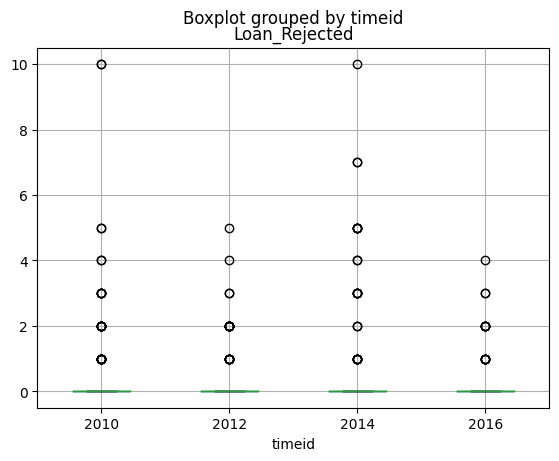

In [ ]:
#Make a boxplot of loan rejection by year
#Leave out the value greater than 98 in the column Loan_Rejected
pivot_df = pivot_df[pivot_df['Loan_Rejected'] != 98]
pivot_df.boxplot(column='Loan_Rejected', by='timeid')

([<matplotlib.axis.XTick at 0x287189d60>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8')])

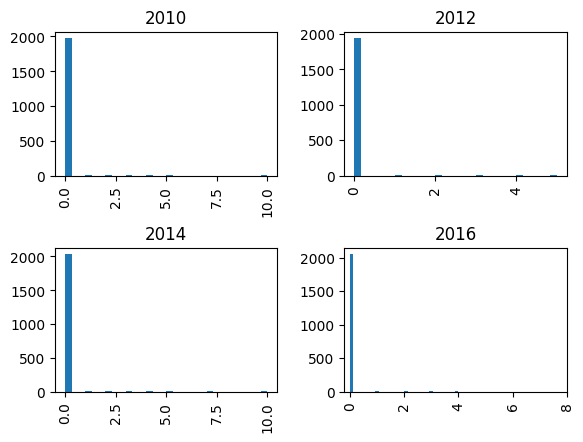

In [ ]:
#Make histogram of loan rejection by year
import matplotlib.pyplot as plt
pivot_df.hist(column='Loan_Rejected', by='timeid', bins=30)
plt.xticks(np.arange(0, 10, step=2))


**Determinants of insurance uptake**

$$
\text{Uptake} = \beta_1 X_{ijt}^{\text{econ}} + \beta_2 X_{ijt}^{\text{behav}} + \beta_3 X_{ijt}^{\text{demo}} + \beta_4 \text{Liquidity\_Constrained} + \epsilon_{ijt} \tag{2}
$$


In [ ]:
pivot_df['Interest_Purchasing'].value_counts()
#replace the value 98 with 0 in the column Interest_Purchasing
pivot_df['Interest_Purchasing'] = pivot_df['Interest_Purchasing'].replace(98, 0)

In [ ]:
pivot_df['Plot_Investment_Dummy'].value_counts()
pivot_df['Plot_Investment_Dummy'] = pivot_df['Plot_Investment_Dummy'].replace(2, 0)

In [ ]:
pivot_df['Transfer_Received'].value_counts()

Transfer_Received
196.0      1106
0.0         935
2000.0      160
1000.0      148
5000.0      136
           ... 
3488.0        1
13726.0       1
17018.0       1
19324.0       1
16560.0       1
Name: count, Length: 2027, dtype: int64

In [ ]:
#Economic variable (plot investment, transfer received, food consumption, annual income) and demean by year
pivot_df['Plot_Investment_Dummy_bar'] = pivot_df.groupby(['timeid'])['Plot_Investment_Dummy'].transform('mean')
pivot_df['Transfer_Received_bar'] = pivot_df.groupby(['timeid'])['Transfer_Received'].transform('mean')
pivot_df['Food_Consumption_bar'] = pivot_df.groupby(['timeid'])['Food_Consumption'].transform('mean')
pivot_df['Annual_Income_bar'] = pivot_df.groupby(['timeid'])['Annual_Income'].transform('mean')
pivot_df['Plot_Investment_Dummy_tfe'] = pivot_df['Plot_Investment_Dummy'] - pivot_df['Plot_Investment_Dummy_bar']
pivot_df['Transfer_Received_tfe'] = pivot_df['Transfer_Received'] - pivot_df['Transfer_Received_bar']
pivot_df['Food_Consumption_tfe'] = pivot_df['Food_Consumption'] - pivot_df['Food_Consumption_bar']
pivot_df['Annual_Income_tfe'] = pivot_df['Annual_Income'] - pivot_df['Annual_Income_bar']


In [ ]:
pivot_df['COCC'].value_counts()
pivot_df['COCC'] = pivot_df['COCC'].replace(2, 0)
pivot_df['Access_Internet'].value_counts() #Number of household members with internet access
pivot_df['Access_Service'].value_counts() #Has households seek advice from the service
pivot_df = pivot_df[pivot_df['Access_Service'] != 98] #drop 98 in the column Access_Service
pivot_df['Access_Service'] = pivot_df['Access_Service'].replace(2, 0)


In [ ]:
#Behavioral variable(COCC, access internet, access service, disaster) and demean by year


In [ ]:
#Demographic variable(family size) 